In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Pandas Library: A Short Introduction

*pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.*

In essence, it offers us the ability to easily import our data sources (such as csv files) into a central pandas object known as a **dataframe**. This object is analogous to a Data Frame in the R programming language or a Table in SQL. It houses structured data in a two-dimensional tabular structure with two sets of labels to uniquely identify a single piece of data: its *index* and *column*.

**Creating a Dataframe from Scratch**

We'll often not need to do this as we can immediately load our data into a dataframe object via pandas functions. However, it's good to know a basic example of how one can construct a dataframe from scratch. Suppose that I wanted to build a dataframe that can store the price of two different items as well as their respective categories (such as electronic, clothing etc.). 

Let's consider the following items:
<ol>
    <li>'*Green Shirt*' that fits under the '*Clothing*' category with pricetag '\$10.10'.</li>
    <li>'*PS4*' that fits under the '*Electronics*' category with pricetag '\$399.99'. </li>
</ol>

In [3]:
# We want to first create our data in the appropriate format.
rawdata = [['Green Shirt', 'Clothing', '10.10'],
        ['PS4', 'Electronics', '399.99']]

# Now we can create the dataframe using the pandas DataFrame constructor
items = pd.DataFrame(data = rawdata, columns = ['Name', 'Category', 'Price ($)'])

# Display the items dataframe
items

,Name,Category,Price ($)
0,Green Shirt,Clothing,10.10
1,PS4,Electronics,399.99


**Common Dataframe Methods and Properties**
<ul>
    <li> *shape*: The shape attribute returns a tuple containing the number of rows in the first entry and number of columns in second entry.
    </li>
    <li> *rename*: The rename method allows us to rename our columns / indices. In the example below, we want to rename one of the columns from 'Price ($)' to 'Price'. This can be done with the rename method that takes in a dictionary object that maps old labels to new labels.
    <li> *axes*: Axis = 0 corresponds to the Index axis and Axis = 1 corresponds to the Column axis.
    </li>
</ul>

In [4]:
# The shape attribute.
print("Shape:", items.shape)

# The rename method. I need to use axis = 1 to specify that I want the column labels changed.
map = {'Price ($)': 'Price'}
items = items.rename(mapper = map, axis = 1)
print("\n", items)

# Selecting out just the Price Column
price_col = items['Price']
print("\nPrice Series:\n", price_col)

Shape: (2, 3)

           Name     Category   Price
0  Green Shirt     Clothing   10.10
1          PS4  Electronics  399.99

Price Series:
 0     10.10
1    399.99
Name: Price, dtype: object


# M5 Data Exploration

## Data Sources:

The M5-Accuracy data from kaggle are the following files:
<ul>
    <li>** calendar.csv ** - Contains information about the dates on which the products are sold. </li>
    <li>**sales_train_validation.csv** - Contains the historical daily unit sales data per product and store [d_1 - d_1913] </li>
    <li>** sample_submission.csv ** - The correct format for submissions. Reference the Evaluation tab for more info. </li>
    <li>**sell_prices.csv ** - Contains information about the price of the products sold per store and date.</li>
</ul>

We'll now use Pandas to explore our Kaggle data. We can read in these files by using the pandas read_csv function that automatically constructs a dataframe out of the csv data. (Note that sample submission doesn't contain data relevant to the competition but simply a desired format for our final data output.)

In [9]:
calendar = pd.read_csv('calendar.csv')
sales_train_val = pd.read_csv('sales_train_validation.csv')
sample_submission = pd.read_csv('sample_submission.csv')
sell_prices = pd.read_csv('sell_prices.csv')

In [10]:
# We'll leave an original copy as is and instead change things up in a second copy.

train_val = sales_train_val
prices = sell_prices


**File Information**

The three main files and their column names with associated meanings are given below. This is an excerpt from the M5 Competitors Guide document (Can be found in the Supplementals Folder or on the [M5 website](https://mofc.unic.ac.cy/m5-competition/)).

File 1: “calendar.csv” 

Contains information about the dates the products are sold.
<ul>
    <li>*date*: The date in a “y-m-d” format.</li>
    <li>*wm_yr_wk*: The id of the week the date belongs to.</li>
    <li>*weekday*: The type of the day (Saturday, Sunday, …, Friday).</li>
    <li>*wday*: The id of the weekday, starting from Saturday.</li>
    <li>*month*: The month of the date.</li>
    <li>*year*: The year of the date.</li>
    <li>*event_name_1*: If the date includes an event, the name of this event.</li>
    <li>*event_type_1*: If the date includes an event, the type of this event.</li>
    <li>*event_name_2*: If the date includes a second event, the name of this event.</li>
    <li>*event_type_2*: If the date includes a second event, the type of this event.</li>
    <li>*snap_CA, snap_TX, and snap_WI*: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.</li>
</ul>

File 2: “sell_prices.csv”

Contains information about the price of the products sold per store and date.
<ul>
    <li>*store_id*: The id of the store where the product is sold.</li>
    <li>*item_id*: The id of the product.</li>
    <li>*wm_yr_wk*: The id of the week.</li>
    <li>*sell_price*: The price of the product for the given week/store. The price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week. Note that although prices are constant at weekly basis, they may change through time (both training and test set).</li> 
</ul>

File 3: “sales_train_validation.csv” 

Contains the historical daily unit sales data per product and store.
<ul>
    <li>*item_id*: The id of the product.</li>
    <li>*dept_id*: The id of the department the product belongs to.</li>
    <li>*cat_id*: The id of the category the product belongs to.</li>
    <li>*store_id*: The id of the store where the product is sold.</li>
    <li>*state_id*: The State where the store is located.</li>
    <li>*d_1, d_2, …, d_i, … d_1941*: The number of units sold at day i, starting from 2011-01-29. </li>
</ul>


In [12]:
# The info method is a useful pandas method to output a brief summary of the dataframe properties. It gives us the total
# number of entries, columns, column names and their respective data types for a given dataframe.
prices.info()

# The describe method finds all numeric columns and gives us several statistics for each one, such as mean, std etc.
prices.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [13]:
# Let's begin exploring the data a bit more. We can choose to load in the first 10 rows / entries using the .head() method.
prices.head(10)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


Hence, we are dealing with a form of data known as a Time Series. We can see that the 'item_id' uniquely identifies an item, then gives its 'sell_price' for a given week under 'wm_yr_wk'. Let's take a look at how many entries correspond to the first item 'HOBBIES_1_001'.

To accomplish this, we can use **Boolean Indexing**, which will be a very useful way to select subsets of a given dataframe that meet a particular criteria. For our interest, we only want rows where item_id = HOBBIES_1_001

In [18]:
# We'll call the dataframe with just HOBBIES_1_001 'hobbies'.
hobbies = prices[prices['item_id']=='HOBBIES_1_001']
hobbies

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


## Plotting Data

Pandas is also compatible with another Python library called matplotlib which roughly speaking allows us to construct graphs / figures to visually represent our data.

Pandas has an in-built method called *plot* that can plot data from a dataframe. It takes the form

*dataframe.plot(x,y,kind,title)*

where the parameters are defined by

<ul>
    <li>x: selects column name to be our x-axis</li>
    <li>y: selects column name to be our y-axis</li>
    <li>kind: selects the type of figure (ex. 'bar','scatter', 'pie', 'line', 'hist' etc.)</li>
    <li>title: the title of the graph</li>
</ul>

We note that the plot method has many more parameters. A full listing can be found in the [official documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).


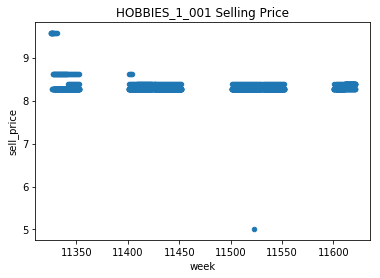

In [22]:
# I prefer not to use `wm_yr_wk' so we'll instead call this column 'week'.

week_map = {'wm_yr_wk': "week"}
hobbies = hobbies.rename(mapper = week_map, axis=1)

# Let's plot its price as a function of week number.
hobbies.plot(x = 'week', y = 'sell_price', kind = 'scatter', title = 'HOBBIES_1_001 Selling Price')

We notice that there is 'severe' outlier data around week number 11520, where the sell_price was at an all-time low of around $5. Let's try to look into this by selecting it out. Judging by the graph, I will define a low outerlier as any sell_price lower than 8.

In [23]:
hobbies_outlier = hobbies[hobbies['sell_price']<8]
hobbies_outlier

,store_id,item_id,week,sell_price
2708925,TX_1,HOBBIES_1_001,11523,5.0


This sell_price of 5.0 corresponded to a single week number 11523. Let's look into a bit more, we'll try to correlate it with the calendar to see if anything special was going on.

In [24]:
calendar = calendar.rename(mapper = week_map, axis=1)
calendar[calendar['week'] == 11523]

,date,week,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1617,2015-07-04,11523,Saturday,1,7,2015,d_1618,IndependenceDay,National,NaN,NaN,1,0,0
1618,2015-07-05,11523,Sunday,2,7,2015,d_1619,NaN,NaN,NaN,NaN,1,1,1
1619,2015-07-06,11523,Monday,3,7,2015,d_1620,NaN,NaN,NaN,NaN,1,1,1
1620,2015-07-07,11523,Tuesday,4,7,2015,d_1621,NaN,NaN,NaN,NaN,1,1,0
1621,2015-07-08,11523,Wednesday,5,7,2015,d_1622,NaN,NaN,NaN,NaN,1,0,1
1622,2015-07-09,11523,Thursday,6,7,2015,d_1623,NaN,NaN,NaN,NaN,1,1,1
1623,2015-07-10,11523,Friday,7,7,2015,d_1624,NaN,NaN,NaN,NaN,1,0,0


The 'HOBBIES_1_001' item was on sale during 'Independence Week', which may explain its low sell price at the time and thus not chalked up to a mistake in the data. We can take a closer look at the data without this outlier present.

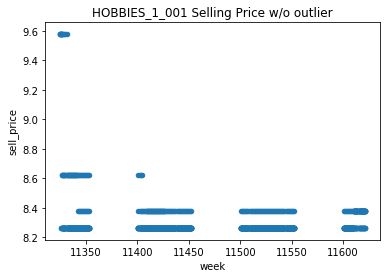

In [25]:
hobbies_normal = hobbies[hobbies['sell_price']>8]
hobbies_normal.plot(x = 'week', y = 'sell_price', kind = 'scatter', title = 'HOBBIES_1_001 Selling Price w/o outlier')

I'm interested in seeing how the sell_price varied between stores in the three different states: CA, TX and WI so we'll group these together and plot the data for the same HOBBIES_1_001 product.

## Matplotlib

*[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.*

We'll try plotting our data with some of the key tools that matplotlib provides.


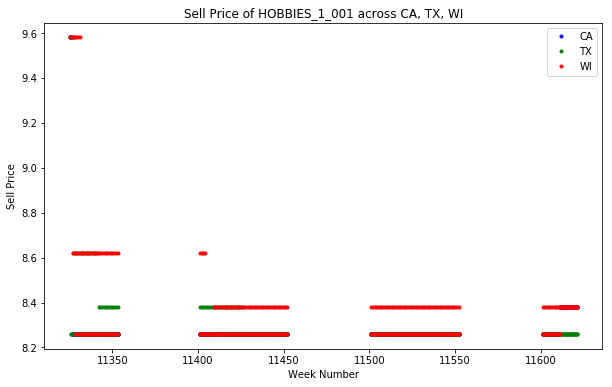

In [26]:
store_ids = hobbies_normal['store_id'].unique()

clusterCA = store_ids[0:4]
clusterTX = store_ids[4:7]
clusterWI = store_ids[7::]

clusters = [clusterCA, clusterTX, clusterWI]
colors = ['blue', 'green', 'red']
labels = ['CA', 'TX', 'WI']

fig, ax = plt.subplots(figsize = (10,6))

for i in range(3):
    
    subset = hobbies_normal[hobbies_normal['store_id'].isin(clusters[i])]
    ax.plot(subset['week'], subset['sell_price'], '.', c = colors[i], label = labels[i])
    
ax.set_title("Sell Price of HOBBIES_1_001 across CA, TX, WI")
ax.set_xlabel("Week Number")
ax.set_ylabel('Sell Price')
ax.legend(loc = 'upper right')
plt.show()

There appears to be possible significant overlap, so we'll plot these diagrams beside one another with [subplots](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot).

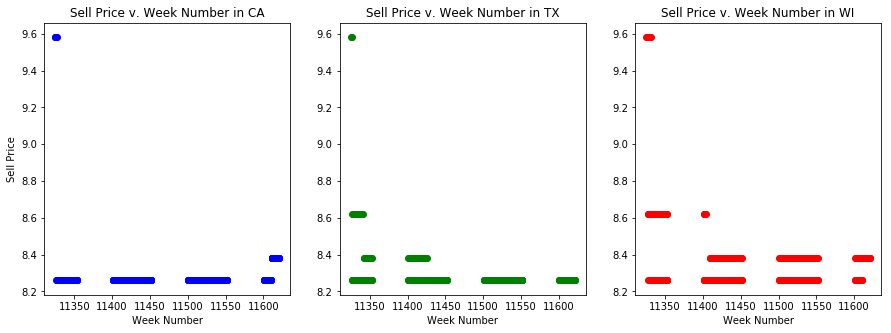

In [35]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

axes = [ax1,ax2,ax3]

for i in range(3):
    
    subset = hobbies_normal[hobbies_normal['store_id'].isin(clusters[i])]
    axes[i].scatter(x = subset['week'],y = subset['sell_price'], c = colors[i])
    
    if i == 0:
        axes[i].set_ylabel("Sell Price")
        
    axes[i].set_xlabel("Week Number")
    axes[i].set_title("Sell Price v. Week Number in " + labels[i])

plt.show()